<a href="https://colab.research.google.com/github/JoanYego/German-Traffic-Sign-Classification/blob/main/German_Traffic_Signs_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Defining the Research Problem

## Specifying the Research Question

The goal of this project is to predict categorical identities of German traffic sign images.

## Defining the Metric for Success

This project will be considered a success when:

- We develop a classification model with an accuracy rate of atleast 90%. The categorical accuracy for this project is defined as true predictions/total predictions.
- The model developed is adjusted and optimized 
- The model does not suffer from any instances of overfitting or underfitting

## Recording the Experimental Design


Below are the steps that will be conducted in this analysis in order to respond to the research question comprehensively:

- Load and preview the data
- Data Cleaning
- EDA
- Implementing the Solution
- Challenging the Solution
- Follow Up Questions

## Data Relevance

The data provided for this challenge contains useful features with relevant information to train the classification model. We used two versions of the dataset for this analysis. The first file was the provided data that we used for predictive analysis. The second file was a csv file that we used for descriptive analysis

# Importing Relevant Libraries

In [5]:
# Data Manipulation Libraries

import pandas as pd
import numpy as np

# Data Visualization Libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Image Loading Libraries

import os
import cv2
import pickle

# Reading the Data

In [1]:
# Connecting to google drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Loading the data

# Defining the file path
traffic_train = "/content/drive/My Drive/GermanTrafficSigns/train.p"
traffic_test = "/content/drive/My Drive/GermanTrafficSigns/test.p"
traffic_valid = "/content/drive/My Drive/GermanTrafficSigns/valid.p"

# Reading the data

with open(traffic_train, mode='rb') as f:
    train = pickle.load(f)
with open(traffic_test, mode='rb') as f:
    test = pickle.load(f)
with open(traffic_valid, mode='rb') as f:
    valid = pickle.load(f)
    
# Classfying the data into features and label

x_train, y_train = train['features'], train['labels'] # training set
x_test, y_test = test['features'], test['labels'] # test set
x_valid , y_valid = valid['features'], valid['labels'] # validation set


# Checking the Data

In [19]:
# Previewing a summary of the data

print("Length of Training Set:", len(X_train))
print("Length of Test Set:", len(y_test))
print("Length of Validation Set:", len(X_valid))


Length of Training Set: 34799
Length of Test Set: 12630
Length of Validation Set: 4410


In [25]:
# Checking the number of observations per class

observations, counts_observations = np.unique(y_train, return_counts = True)

print(observations)
print(counts_observations)


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42]
[ 180 1980 2010 1260 1770 1650  360 1290 1260 1320 1800 1170 1890 1920
  690  540  360  990 1080  180  300  270  330  450  240 1350  540  210
  480  240  390  690  210  599  360 1080  330  180 1860  270  300  210
  210]


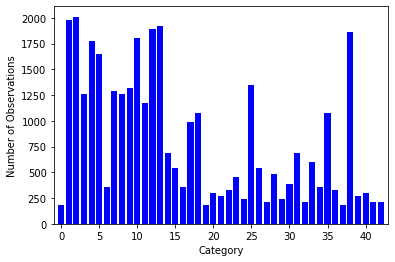

In [30]:
# Visualizing the number of observations per class

plt.bar( np.arange( 43 ), counts_observations,color='blue' )
plt.xlabel('Category')
plt.ylabel('Number of Observations')
plt.xlim([-1, 43])

plt.show()
    

- From the above graph, we notice that the dataset is imbalanced since the observations vary for different classes.

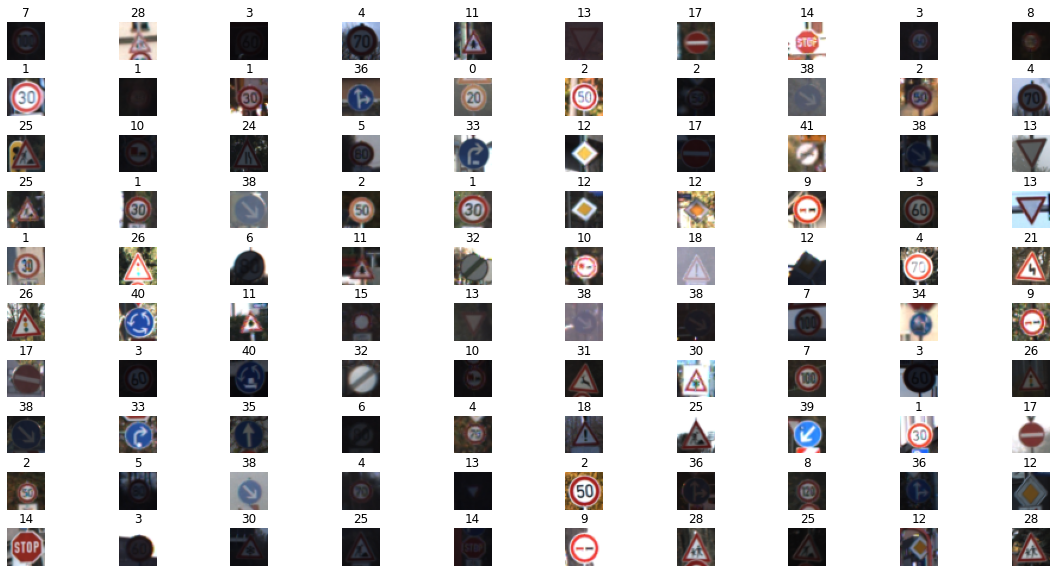

In [40]:
# Previewing 100 random images

import random

fig, axs = plt.subplots(10,10, figsize=(20, 10))
fig.subplots_adjust(hspace = .5, wspace=.001)
axs = axs.ravel()
for i in range(100):
    index = random.randint(0, len(X_train))
    image = X_train[index]
    axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(y_train[index])

- Above are 100 random traffic image signs belonging to different classes. Some of the signs include speed signs, stop signs, junction, children crossing signs among others.

Loading and previewing the csv files

In [76]:
train = pd.read_csv('/Train.csv')
test = pd.read_csv('/Test.csv')
Meta = pd.read_csv('/Meta.csv')


In [ ]:
# Checking the number of records and columns

train.shape

(39209, 8)

In [ ]:
# Checking the top 7 records

train.head(5)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train/20/00020_00000_00000.png
1,28,27,5,6,23,22,20,Train/20/00020_00000_00001.png
2,29,26,6,5,24,21,20,Train/20/00020_00000_00002.png
3,28,27,5,6,23,22,20,Train/20/00020_00000_00003.png
4,28,26,5,5,23,21,20,Train/20/00020_00000_00004.png


In [ ]:
# Checking the last 10 records of the dataset
train.tail(10)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
39199,44,46,6,6,39,41,42,Train/42/00042_00007_00020.png
39200,44,46,5,5,39,41,42,Train/42/00042_00007_00021.png
39201,47,50,5,6,42,45,42,Train/42/00042_00007_00022.png
39202,49,50,6,5,44,45,42,Train/42/00042_00007_00023.png
39203,51,53,6,5,46,48,42,Train/42/00042_00007_00024.png
39204,52,56,5,6,47,51,42,Train/42/00042_00007_00025.png
39205,56,58,5,5,51,53,42,Train/42/00042_00007_00026.png
39206,58,62,5,6,53,57,42,Train/42/00042_00007_00027.png
39207,63,69,5,7,58,63,42,Train/42/00042_00007_00028.png
39208,68,69,7,6,62,63,42,Train/42/00042_00007_00029.png


In [ ]:
# Previewing datatypes for each attribute

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39209 entries, 0 to 39208
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Width    39209 non-null  int64 
 1   Height   39209 non-null  int64 
 2   Roi.X1   39209 non-null  int64 
 3   Roi.Y1   39209 non-null  int64 
 4   Roi.X2   39209 non-null  int64 
 5   Roi.Y2   39209 non-null  int64 
 6   ClassId  39209 non-null  int64 
 7   Path     39209 non-null  object
dtypes: int64(7), object(1)
memory usage: 2.4+ MB


- Previewing details of the test set

In [ ]:
# Checking the last 5 records

test.tail(5)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
12625,42,41,5,6,37,36,12,Test/12625.png
12626,50,51,6,5,45,46,33,Test/12626.png
12627,29,29,6,6,24,24,6,Test/12627.png
12628,48,49,5,6,43,44,7,Test/12628.png
12629,32,31,6,5,27,26,10,Test/12629.png


- Previewing details of the meta data

In [ ]:
# Checking the top 7 records

Meta.head(7)

,Path,ClassId,ShapeId,ColorId,SignId
0,Meta/27.png,27,0,0,1.32
1,Meta/0.png,0,1,0,3.29
2,Meta/1.png,1,1,0,3.29
3,Meta/10.png,10,1,0,3.27
4,Meta/11.png,11,0,0,1.22
5,Meta/12.png,12,2,2,2.3
6,Meta/13.png,13,4,0,2.1


# Data Cleaning

In [ ]:
# Check for duplicate records

train.duplicated().any()

False

- No duplicate records

In [ ]:
# Checking any missing values

train.isnull().sum()

Width      0
Height     0
Roi.X1     0
Roi.Y1     0
Roi.X2     0
Roi.Y2     0
ClassId    0
Path       0
dtype: int64

- No null values

In [ ]:
train.columns

Index(['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId',
       'Path'],
      dtype='object')

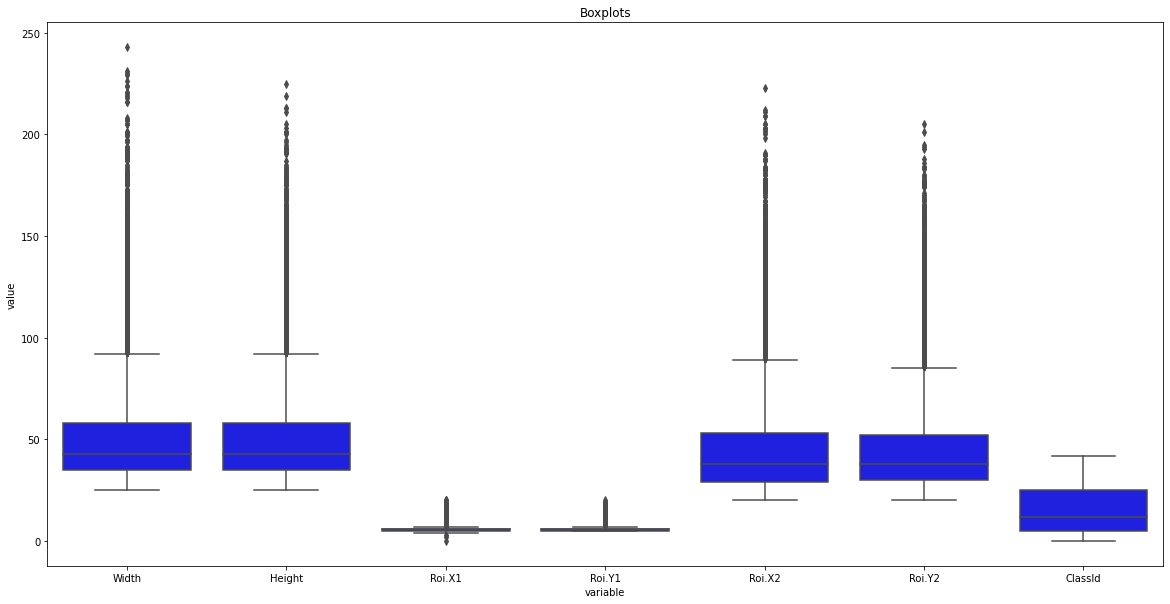

In [ ]:
# Using boxplots to check for outliers

boxplot = pd.DataFrame(data = train, columns = ['Width', 'Height', 'Roi.X1', 'Roi.Y1', 'Roi.X2', 'Roi.Y2', 'ClassId'])

plt.figure(figsize=(20,10))

sns.boxplot(x='variable', y='value', data=pd.melt(boxplot), color = 'blue').set_title('Boxplots')

plt.show()

- Other than 'ClassId' column, all other attributes have outliers. 

Dropping Outliers

In [ ]:
train.shape

(39209, 8)

In [ ]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

df1_out = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
df1_out.shape

Width      23.0
Height     23.0
Roi.X1      1.0
Roi.Y1      1.0
Roi.X2     24.0
Roi.Y2     22.0
ClassId    20.0
dtype: float64


(34972, 8)

- No duplicate records

# Exploratory Data Analysis

## Univariate Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


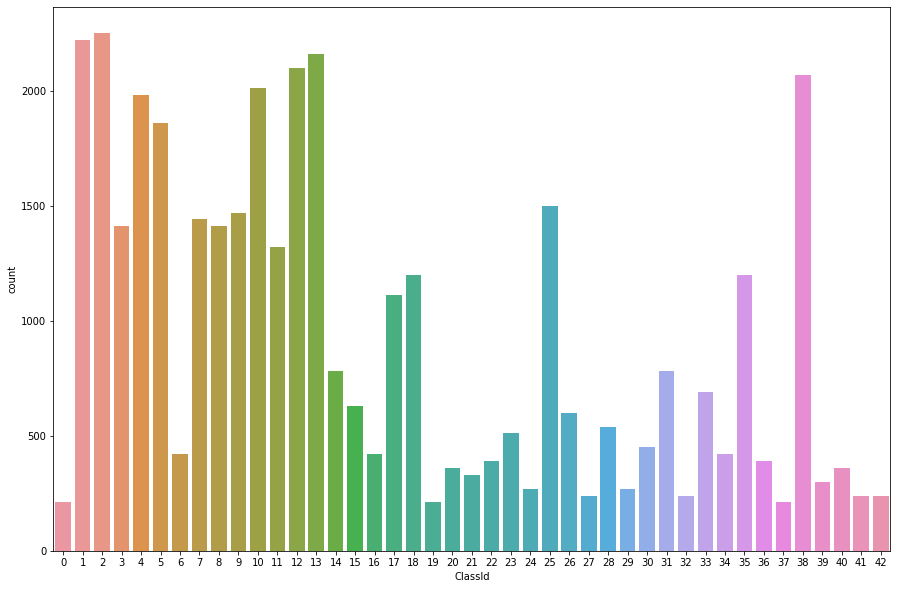

In [ ]:
# Histogram to check the number of images per classid for the train set

plt.figure(figsize=(15,10))
sns.countplot(train.ClassId)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


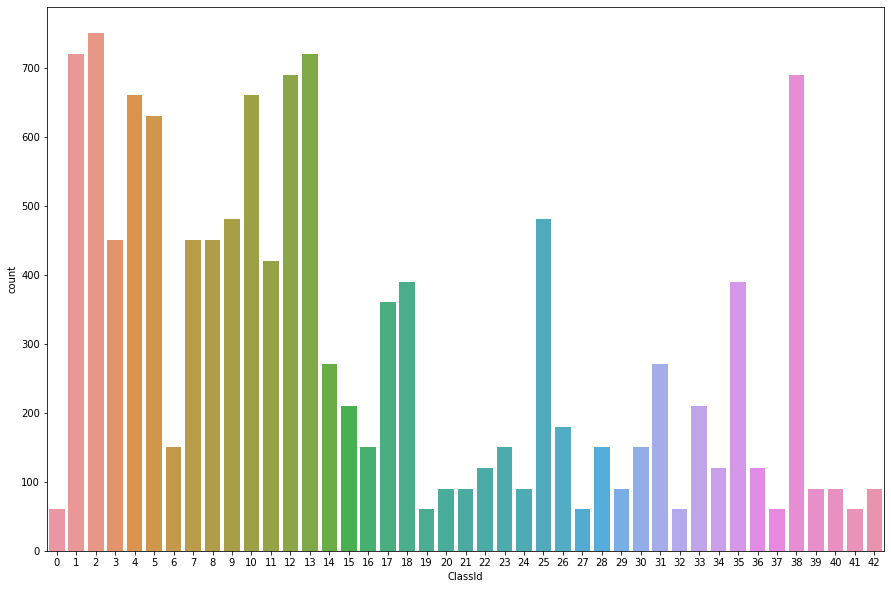

In [ ]:
# Histogram to check the number of images per classid for the test set

plt.figure(figsize=(15,10))
sns.countplot(test.ClassId)

In [ ]:
# Summary statistics for the test data

test.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000,12630.000000
mean,50.507759,50.364450,5.998021,5.982423,44.864450,44.758116,15.551069
std,25.088483,23.698908,1.543954,1.427424,23.776102,22.494697,11.947123
min,25.000000,25.000000,1.000000,5.000000,20.000000,20.000000,0.000000
25%,34.000000,35.000000,5.000000,5.000000,29.000000,29.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,57.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,266.000000,232.000000,23.000000,19.000000,244.000000,212.000000,42.000000


In [ ]:
# Summary statistics for the train data

train.describe()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId
count,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000,39209.000000
mean,50.835880,50.328930,5.999515,5.962381,45.197302,44.728379,15.788390
std,24.306933,23.115423,1.475493,1.385440,23.060157,21.971145,12.013238
min,25.000000,25.000000,0.000000,5.000000,20.000000,20.000000,0.000000
25%,35.000000,35.000000,5.000000,5.000000,29.000000,30.000000,5.000000
50%,43.000000,43.000000,6.000000,6.000000,38.000000,38.000000,12.000000
75%,58.000000,58.000000,6.000000,6.000000,53.000000,52.000000,25.000000
max,243.000000,225.000000,20.000000,20.000000,223.000000,205.000000,42.000000


In [ ]:
# Summary statistics for the Meta data

Meta.describe()

,ClassId,ShapeId,ColorId
count,43.000000,43.000000,43.000000
mean,21.000000,0.790698,0.511628
std,12.556539,0.803508,0.935340
min,0.000000,0.000000,0.000000
25%,10.500000,0.000000,0.000000
50%,21.000000,1.000000,0.000000
75%,31.500000,1.000000,1.000000
max,42.000000,4.000000,3.000000


In [ ]:
# Summary details for categorical features of the train set

train.describe(include=['O'])

,Path
count,39209
unique,39209
top,Train/10/00010_00054_00022.png
freq,1


In [ ]:
# Summary details for categorical features of the test set

test.describe(include=['O'])

,Path
count,12630
unique,12630
top,Test/05067.png
freq,1


In [ ]:
# Summary details for categorical features of the meta data

Meta.describe(include=['O'])

,Path,SignId
count,43,43
unique,43,33
top,Meta/0.png,3.29
freq,1,8


## Bivariate Analysis

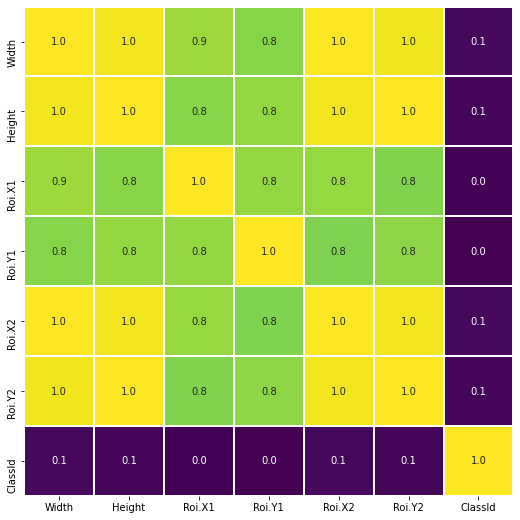

In [ ]:
# Plotting the Pearson Correlation Coefficients for the train

plt.figure(figsize=(13,9))
sns.heatmap(train.corr(), annot=True, cbar=False, cmap='viridis', linewidth=1, fmt='.1f', square=True)

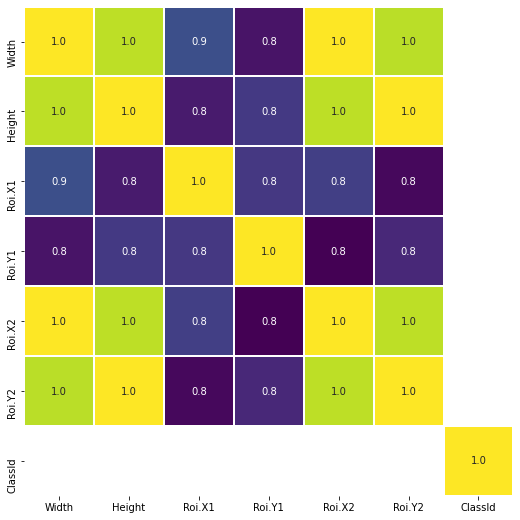

In [ ]:
# Filtering coefficients 

plt.figure(figsize=(13,9))
corr = train.corr()
sns.heatmap(corr[(corr >= 0.5) | (corr <= 0.0)], annot=True, cbar=False,
                                 cmap='viridis', linewidth=1, fmt='.1f', square=True)

- ClassId, which is the target, has no correlation to any of the features. This is expected since the ClassId is a categorical attribute.

# Implementing the Solution

## Baseline Model

- For this analysis, the baseline model will be sequential model type

In [78]:
# Importing relevant modeling libraries

import keras

from keras.models import Sequential
from keras import regularizers 
from keras.layers import Dense, Flatten, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization 
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint


In [79]:
# Defining baseline model

baseline_model = Sequential() 

# Adding layers to the model

baseline_model.add(Dense(128, activation='relu', input_shape=(32*32*3,))) 
baseline_model.add(BatchNormalization()) # normalizing and scaling the data
baseline_model.add(Dense(128, activation='relu'))
baseline_model.add(BatchNormalization())
baseline_model.add(Dropout(0.5)) # applying dropout feature to input to prevent overfitting
baseline_model.add(Dense(128, activation='relu'))
baseline_model.add(BatchNormalization())
baseline_model.add(Dropout(0.5))
baseline_model.add(Dense(128, activation='relu'))
baseline_model.add(BatchNormalization())
baseline_model.add(Dense(n_classes, activation='softmax'))

In [80]:
# Checking the summary of the baseline model

baseline_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 128)               393344    
_________________________________________________________________
batch_normalization_16 (Batc (None, 128)               512       
_________________________________________________________________
dense_25 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_17 (Batc (None, 128)               512       
_________________________________________________________________
dropout_14 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_26 (Dense)             (None, 128)               16512     
_________________________________________________________________
batch_normalization_18 (Batc (None, 128)              

In [81]:
# Reshaping the features to a 32 by 32 by 3 matrix

X_train_baseline = X_train.reshape(len(X_train), 32*32*3).astype('float32')
X_valid_baseline = X_valid.reshape(len(X_valid), 32*32*3).astype('float32')

In [82]:
# converting  the labels to categorical types

y_train_baseline = keras.utils.to_categorical(y_train, n_classes)
y_valid_baseline = keras.utils.to_categorical(y_valid, n_classes)

In [58]:
# Fitting the model

model.fit(X_train_baseline, y_train_baseline, batch_size=128, epochs=100, verbose=1, validation_data=(X_valid_baseline, y_valid_baseline))

Epoch 1/100
272/272 [==============================] - 2s 9ms/step - loss: 2.6440 - accuracy: 0.2948 - val_loss: 2.1399 - val_accuracy: 0.3798
Epoch 2/100
272/272 [==============================] - 2s 8ms/step - loss: 1.2999 - accuracy: 0.6033 - val_loss: 1.0907 - val_accuracy: 0.6746
Epoch 3/100
272/272 [==============================] - 2s 8ms/step - loss: 0.9331 - accuracy: 0.7152 - val_loss: 1.3563 - val_accuracy: 0.5977
Epoch 4/100
272/272 [==============================] - 2s 8ms/step - loss: 0.7506 - accuracy: 0.7734 - val_loss: 0.7512 - val_accuracy: 0.7667
Epoch 5/100
272/272 [==============================] - 2s 8ms/step - loss: 0.6217 - accuracy: 0.8124 - val_loss: 0.6400 - val_accuracy: 0.7909
Epoch 6/100
272/272 [==============================] - 2s 8ms/step - loss: 0.5774 - accuracy: 0.8284 - val_loss: 0.6806 - val_accuracy: 0.7995
Epoch 7/100
272/272 [==============================] - 2s 8ms/step - loss: 0.5239 - accuracy: 0.8438 - val_loss: 0.7592 - val_accuracy: 0.7828

- The baseline model has an accuracy of 96.38% with a loss function of 11.71%. 
- The val_accuracy of the model is 89.41% and a loss function of 46.72%
- The loss and accuracy are measures of loss and accuracy on the training set, while val_loss and val_acc are measures of loss and accuracy on the validation set.
- At the moment the baseline model has an accuracy of 96.38% on the training set and 89.41% on the validation set. This means that we can expect the model to perform with ~ 89% accuracy on new data.

- Checking model performance for a lower batch size

In [84]:
# Fitting the baseline model with a batch size of 32

history=baseline_model.fit(X_train_baseline,y_train_baseline,epochs=100,batch_size=32, validation_data=(X_valid_baseline, y_valid_baseline))

Epoch 1/100
1088/1088 [==============================] - 8s 7ms/step - loss: 2.5080 - accuracy: 0.3055 - val_loss: 2.1062 - val_accuracy: 0.4011
Epoch 2/100
1088/1088 [==============================] - 8s 7ms/step - loss: 1.3485 - accuracy: 0.5869 - val_loss: 1.2086 - val_accuracy: 0.6288
Epoch 3/100
1088/1088 [==============================] - 8s 7ms/step - loss: 1.0383 - accuracy: 0.6853 - val_loss: 0.8116 - val_accuracy: 0.7381
Epoch 4/100
1088/1088 [==============================] - 8s 7ms/step - loss: 0.8808 - accuracy: 0.7317 - val_loss: 0.8003 - val_accuracy: 0.7551
Epoch 5/100
1088/1088 [==============================] - 8s 7ms/step - loss: 0.7844 - accuracy: 0.7612 - val_loss: 0.6292 - val_accuracy: 0.8166
Epoch 6/100
1088/1088 [==============================] - 8s 7ms/step - loss: 0.6997 - accuracy: 0.7871 - val_loss: 0.7615 - val_accuracy: 0.7574
Epoch 7/100
1088/1088 [==============================] - 8s 7ms/step - loss: 0.6738 - accuracy: 0.7965 - val_loss: 0.6838 - val_ac

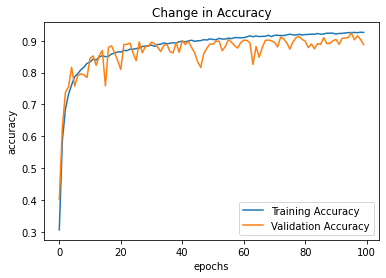

In [94]:
# Plotting the accuracies vs epoch

plt.figure(0)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Change in Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

- The training accuracy increases consistently but the validation accuracy is quite unstable.

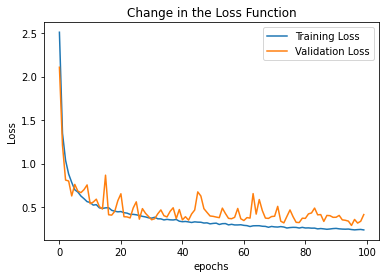

In [95]:
# Plotting the loss function vs epochs

plt.figure(1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Change in the Loss Function')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Challenging the Solution

- From the above results, we notice that the accuracy on the training set has consistently improved with ascending epoch. However, the accuracy on the validation set was quite unstable. This implies that our baseline model is great on the training data but could suffer from instability on completely new data. As such, the baseline model should be further optimized using Convolutional Neural Networks (CNN) to improve val_accuracy stability and overall accuracy score.

# Follow-up Questions

## a) Did we have the right question?

Yes, the reasearch question was clear and specific.

## b) Did we have the right data?

Yes, the data was relevant to the project. The dataset was also large enough for modeling.

## c) Do we need other data to answer the research question?

Not necessarily.